# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [17]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#import sklearn

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [18]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


---
### Further Exploration: Univariate Data Analysis

To better understand how the four features `MEDV`, `RM`, `LSTAT`, and `PTRATIO` are distributed in the dataset, I shall explore histograms and descriptive statistics for each of these features. 

In [124]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

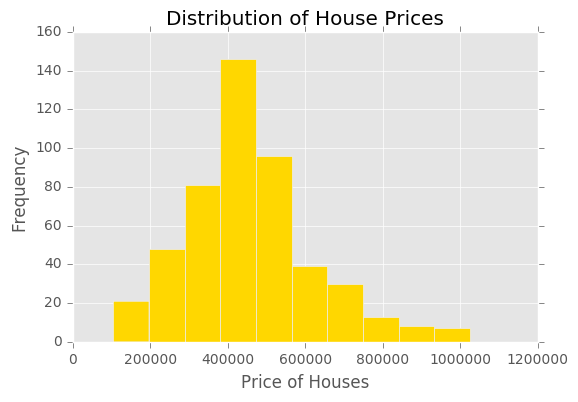

In [140]:
# plotting histogram
prices_plot = plt.hist(data["MEDV"], color = "gold")
plt.xlabel("Price of Houses")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")

The prices of houses are normally distributed about the mean price of 454,342.94 dollars with a slight right skew.  Thus, although the standard deviation is low and the mean and median prices are far closer to the minimum price, the maximum price of 1,024,800.00 dollars is not an outlier.

Mean num. rooms: 6.24
Median num. rooms: 6.18
Standard deviation of num. rooms: 0.64


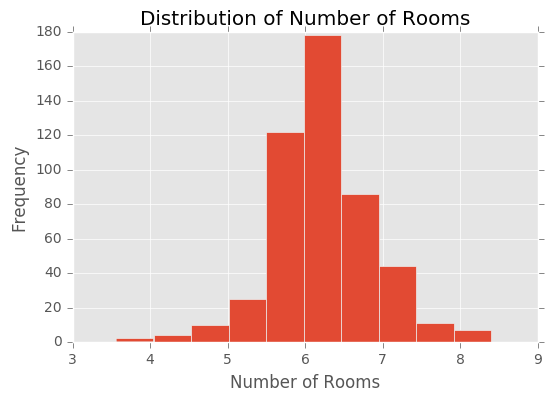

In [135]:
# plotting histogram
rooms_plot = plt.hist(data["RM"])
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Rooms")

# descriptive statistics
mean_rm = np.mean(data["RM"])
median_rm = np.median(data["RM"])
std_rm = np.std(data["RM"])
print "Mean num. rooms: {:,.2f}".format(mean_rm)
print "Median num. rooms: {:,.2f}".format(median_rm)
print "Standard deviation of num. rooms: {:,.2f}".format(std_rm)

The number of rooms appears to be normally distributed about the mean of 6.24 rooms with standard deviation of 0.64 rooms.

Mean perc.: 12.94
Median perc.: 11.69
Standard deviation of perc.: 7.07


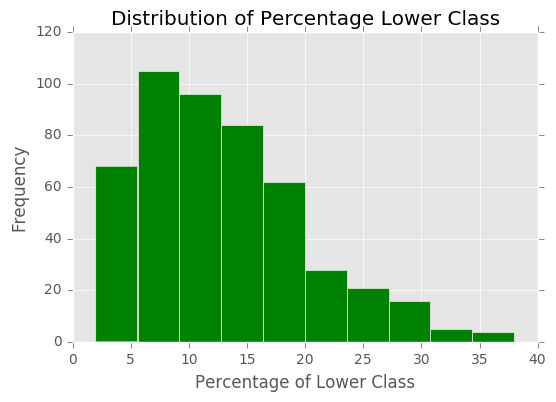

In [136]:
# plotting histogram 
class_plot = plt.hist(data["LSTAT"], color = "green")
plt.xlabel("Percentage of Lower Class")
plt.ylabel("Frequency")
plt.title("Distribution of Percentage Lower Class")

# descriptive statistics
mean_lstat = np.mean(data["LSTAT"])
median_lstat = np.median(data["LSTAT"])
std_lstat = np.std(data["LSTAT"])
print "Mean perc.: {:,.2f}".format(mean_lstat)
print "Median perc.: {:,.2f}".format(median_lstat)
print "Standard deviation of perc.: {:,.2f}".format(std_lstat)

The percentage of lower class homeowners is right skewed with the majority of the data congregating about the mean of 12.94%.

Mean ratio: 18.52
Median ratio: 19.10
Standard deviation of ratio: 2.11


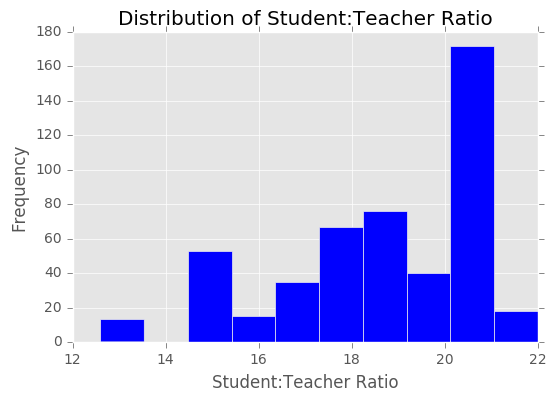

In [137]:
# plotting histogram
ratio_plot = plt.hist(data["PTRATIO"], color = "blue")
plt.xlabel("Student:Teacher Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Student:Teacher Ratio")

# descriptive statistics
mean_pt = np.mean(data["PTRATIO"])
median_pt = np.median(data["PTRATIO"])
std_pt = np.std(data["PTRATIO"])
print "Mean ratio: {:,.2f}".format(mean_pt)
print "Median ratio: {:,.2f}".format(median_pt)
print "Standard deviation of ratio: {:,.2f}".format(std_pt)

The student:teacher ratio is significantly left skewed with a significant peak at 19.10.

---
### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** I hypothesize that as the average number of rooms among homes in the neighborhood increases, the average size of the homes in that neighborhood also increases.  A larger average size must coincide with a greater average property value.  I also hypothesize that as the percentage of lower class homeowners in the neighborhood increases, the average property value will decrease as a greater percentage of homeowners will not be able to afford highly priced homes.  As the ratio of students to teachers in primary and secondary schools in the neighborhood increases, the average quality of primary and secondary schools will decrease.  A lower average quality of neighboring schools will lead to a lower average property value as families with means decide to settle in an area based on the quality of education.  

---
### Futher Exploration: Bivariate Data Analysis

I will test my hypotheses by running the below code and consulting the resulting scatter plots which provide a visual representation of the underlying relationships between each predictor variable (`RM`, `LSTAT`, and `PTRATIO`) and the response variable (`MEDV`).

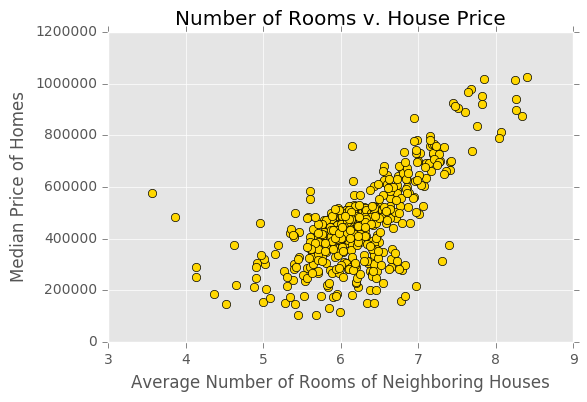

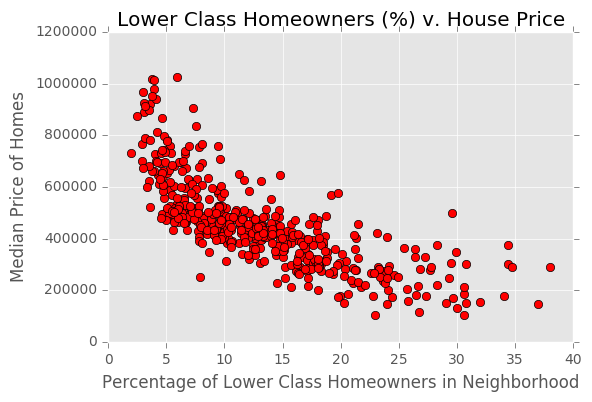

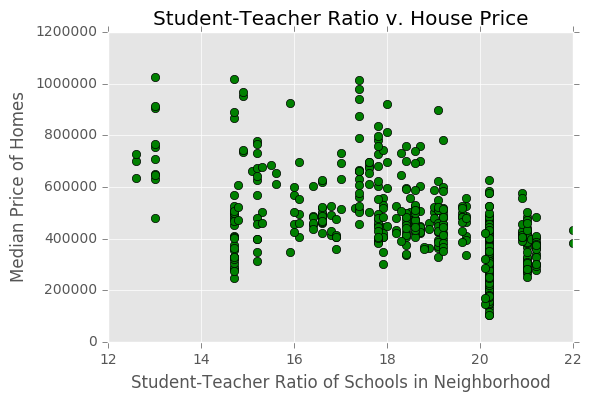

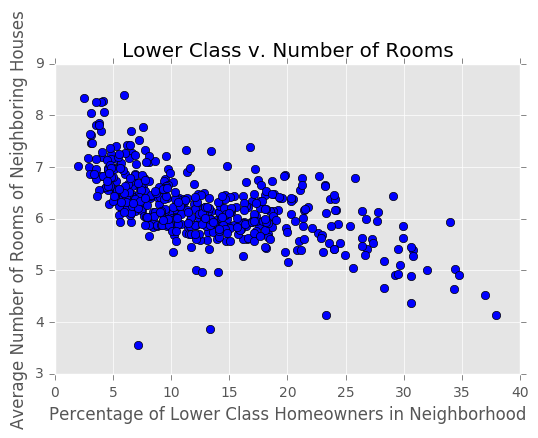

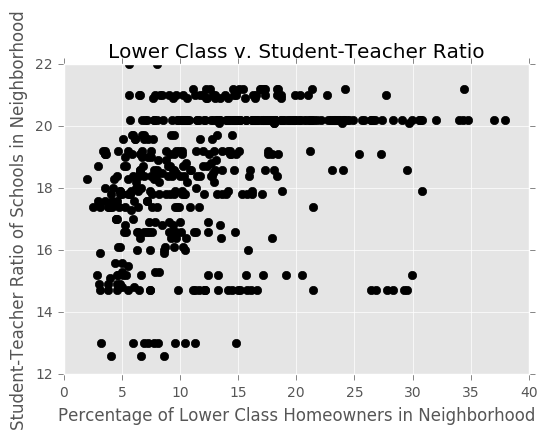

In [141]:
# 'RM' versus prices
fig = plt.figure()  
ax = plt.axes()
ax.plot(data["RM"], prices, "o", color='gold')
ax.set_xlabel("Average Number of Rooms of Neighboring Houses")
ax.set_ylabel("Median Price of Homes")
ax.set_title("Number of Rooms v. House Price")
plt.show() 

# 'LSTAT' versus prices
fig = plt.figure()  
ax = plt.axes()
ax.plot(data["LSTAT"], prices, "o", color='red')
ax.set_xlabel("Percentage of Lower Class Homeowners in Neighborhood")
ax.set_ylabel("Median Price of Homes")
ax.set_title("Lower Class Homeowners (%) v. House Price")
plt.show() 

# 'PTRATIO' versus prices
fig = plt.figure()  
ax = plt.axes()
ax.plot(data["PTRATIO"], prices, "o", color='green')
ax.set_xlabel("Student-Teacher Ratio of Schools in Neighborhood")
ax.set_ylabel("Median Price of Homes")
ax.set_title("Student-Teacher Ratio v. House Price")
plt.show() 

# 'LSTAT' versus 'RM'
fig = plt.figure()  
ax = plt.axes()
ax.plot(data["LSTAT"], data["RM"], "o", color='blue')
ax.set_xlabel("Percentage of Lower Class Homeowners in Neighborhood")
ax.set_ylabel("Average Number of Rooms of Neighboring Houses")
ax.set_title("Lower Class v. Number of Rooms")
plt.show() 

# 'LSTAT' versus 'PTRATIO'
fig = plt.figure()  
ax = plt.axes()
ax.plot(data["LSTAT"], data["PTRATIO"], "o", color='black')
ax.set_xlabel("Percentage of Lower Class Homeowners in Neighborhood")
ax.set_ylabel("Student-Teacher Ratio of Schools in Neighborhood")
ax.set_title("Lower Class v. Student-Teacher Ratio")
plt.show() 

From the above plots, we can discern the following:
* There is a strong positive correlation between the Number of Rooms and the Median House Price.
* There is a strong negative correlation between the Percentage of Lower Class Homeowners and the Median House Price.
* There is no apparent correlation between the Student-Teacher Ratio and Median House Price.
* There is a slight negative correlation between the Percentage of Lower Class Homeowners and the number of rooms.
* There is no apparent correlation between the Percentage of Lower Class Homeowners and the Student-Teacher Ratio.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [20]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [21]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** I would say that the model successfully captures the variation of the target variable due to the large coefficient of determination which has a value of 0.923.  In other words, the model explains roughly 92% of the variability of the target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [22]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size = 0.2, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **  The purpose of our machine learning algorithm is not only to fit a model to a training data set, but also to use our model to predict future values.  If we are not provided a test dataset, it is imperative that we split our dataset into a ratio of training and testing subsets.  This way, we can assess our algorithm's ability to learn and determine what modifications to make.  Without testing our model, we have no way of knowing if the generalizations it makes are too broad or too specific and are overfitting.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

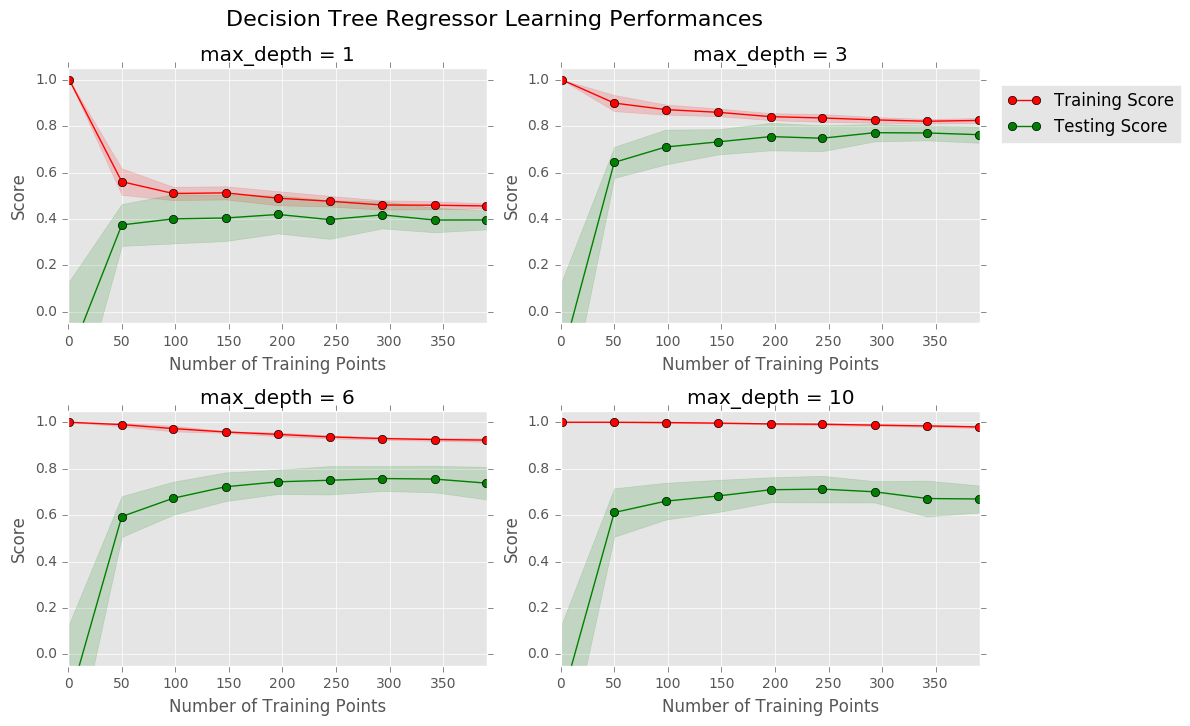

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** Let us look at the graph at the top right.  The maximum depth equals 3.  As more training points are added, the training score rapidly drops to about 0.8 where it then stabilizes.  As more training points are added, the testing score increases first rapidly to about 0.6 and then stabilizes at a value just under 0.7.  Adding more training points past this point will not benefit the model because the scores have already stabilized.  (To be more specific, for each additional training data point included up to 50 points total, we have rapid changes in our training and testing scores.  For each additional training point added after that, we have slower changes in our scores.)

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

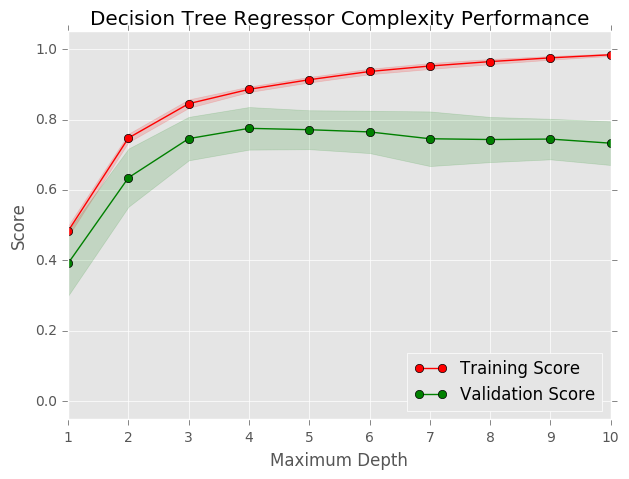

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** From the above plot of the Decision Tree Regression Complexity Performance, the model's bias is captured in the magnitude of the validation score and the variance is captured in the difference between the training and validation scores.  When the model is trained with a maximum depth of 1, the model suffers from high bias and low variance.  When the model is trained with a maximum depth of 10, the added complexity (depth) leads to lower bias and higher variance.  We also see diminishing returns as the extent to which increasing depth improves the training and validation scores decreases over time.  

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **  From the above plot, we see that when we have a tree with maximum depth of 4 we have a good marriage of relatively low bias and relatively low variance.  That is, the validation score is about 0.8, and the distance between the training score and validation score is fairly minimal.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search technique searches for an optimal value for a model's parameter through a specified space.  The technique must be guided by a performance metric such as mean squared error, for which we can use cross validation.  We apply this technique to our learing algorithms in order to determine that the model has correctly learned the parameter values without overfitting to the training data.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** Since we were not provided with testing data, we split our dataset into two subsets: training data and testing data.  As we have seen, the number of training data points impacts both our training and testing scores, namely by decreasing variance.  Cross-validation allows us to obtain the optimal split of data.  It first partitions the data into K equal sized subsets (folds).  The model is then trained on each subset, and the results are averaged.  This averaging of the results allows us to have a more accurate estimate of our parameter's performance; this is why it is used in conjunction with grid search.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [92]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn import svm, datasets
from sklearn.cross_validation import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, verbose=True)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [93]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
 
# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Parameter 'max_depth' is 5 for the optimal model.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


**Answer: **  According to our implementation of grid search used with cross validation, it appears that the optimal model has a maximum depth of 5.  This is different from my guess in Question 6 which I made without incorporating any performance metric.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [96]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,000.00
Predicted selling price for Client 2's home: $175,700.00
Predicted selling price for Client 3's home: $875,700.00


**Answer: ** I would recommend that the clients sell their houses at the above prices predicted by the model.  I feel confident in these predictions for the following reasons:
* The prices are within the range of values calculated for house price in the **Data Exploration** section; they are not outliers.
* The values for rooms, poverty level, and student-teacher ratio are all within the range of values present in the dataset (as illustrated in **Further Exploration: Univariate Data Analysis**); the algorithm has seen points in the dataset which are similar to those found in `client_data`.
* The dataset has 489 points; thus the model has enough information based on which it can make generalizations for the model. 
* The above statement in conjunction with the result of running the line of code below, which tells us that the model has an R^2 value of about 0.905 (the model explains roughly 90.5% of the variability in the response variable), leads me to believe that the model has closely predicted the housing prices.

In [101]:
reg.score(X_train, y_train)

0.90522633869529479

---
### Further Exploration: Looking for Similar Points
I want to see if there are any points in the dataset similar to those found in client_data.

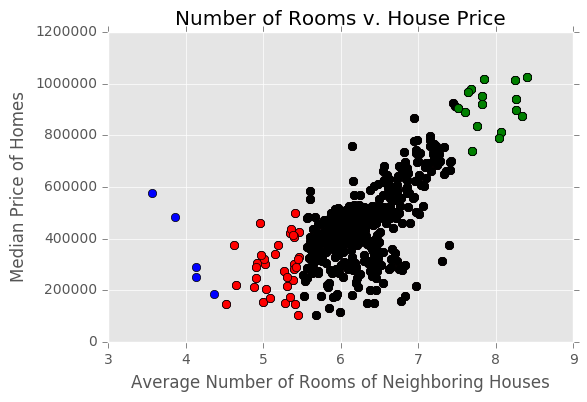

In [79]:
fig = plt.figure()  
ax = plt.axes()
ax.plot(data["RM"][data["RM"] >= 3.5], prices[data["RM"] >= 3.5], "o", color='blue')
ax.plot(data["RM"][data["RM"] >= 4.5], prices[data["RM"] >= 4.5], "o", color='red')
ax.plot(data["RM"][data["RM"] >= 5.5], prices[data["RM"] >= 5.5], "o", color='black')
ax.plot(data["RM"][data["RM"] >= 7.5], prices[data["RM"] >= 7.5], "o", color='green')
ax.plot(data["RM"][data["RM"] >= 8.5], prices[data["RM"] >= 8.5], "o", color='white')
ax.set_xlabel("Average Number of Rooms of Neighboring Houses")
ax.set_ylabel("Median Price of Homes")
ax.set_title("Number of Rooms v. House Price")
plt.show() 

From the above plot, we can say the following about the colors of points:
* **green:** greater than 7.5 rooms
* **black:** between 5.5 (inclusive) and 7.5 rooms (exclusive)
* **red:** between 4.5 (inclusive) and 5.5 rooms (exclusive)
* **blue:** between 3.5 (inclusive) and 4.5 rooms (exclusive)

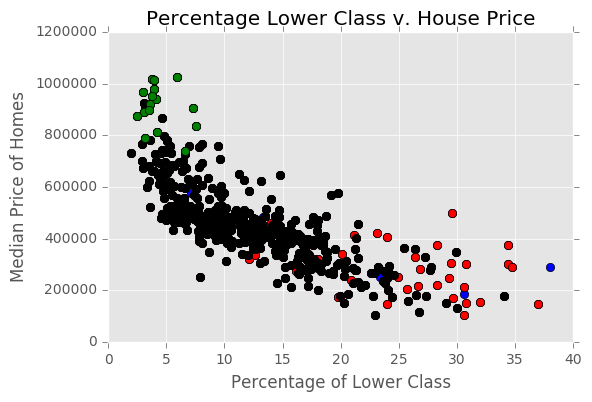

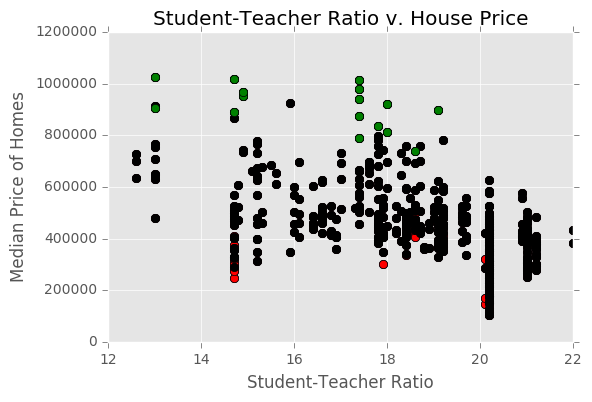

In [99]:
fig = plt.figure()  
ax = plt.axes()
ax.plot(data["LSTAT"][data["RM"] >= 3.5], prices[data["RM"] >= 3.5], "o", color='blue')
ax.plot(data["LSTAT"][data["RM"] >= 4.5], prices[data["RM"] >= 4.5], "o", color='red')
ax.plot(data["LSTAT"][data["RM"] >= 5.5], prices[data["RM"] >= 5.5], "o", color='black')
ax.plot(data["LSTAT"][data["RM"] >= 7.5], prices[data["RM"] >= 7.5], "o", color='green')
ax.plot(data["LSTAT"][data["RM"] >= 8.5], prices[data["RM"] >= 8.5], "o", color='white')
ax.set_xlabel("Percentage of Lower Class")
ax.set_ylabel("Median Price of Homes")
ax.set_title("Percentage Lower Class v. House Price")
plt.show() 

fig = plt.figure()  
ax = plt.axes()
ax.plot(data["PTRATIO"][data["RM"] >= 3.5], prices[data["RM"] >= 3.5], "o", color='blue')
ax.plot(data["PTRATIO"][data["RM"] >= 4.5], prices[data["RM"] >= 4.5], "o", color='red')
ax.plot(data["PTRATIO"][data["RM"] >= 5.5], prices[data["RM"] >= 5.5], "o", color='black')
ax.plot(data["PTRATIO"][data["RM"] >= 7.5], prices[data["RM"] >= 7.5], "o", color='green')
ax.plot(data["PTRATIO"][data["RM"] >= 8.5], prices[data["RM"] >= 8.5], "o", color='white')
ax.set_xlabel("Student-Teacher Ratio")
ax.set_ylabel("Median Price of Homes")
ax.set_title("Student-Teacher Ratio v. House Price")
plt.show() 

Using the above plots, we can see the following:
* There are 2 homes similar to cilent 1's home, with prices at about 300,000 and about 400,000.
* There are 2 homes similar to client 2's home, with prices at about 200,000 and about 300,000.
* There are 2 homes similar to client 3's home; their prices at about 850,000 and about 1,000,000.

The model's predicted values all lie within or close to these ranges.  Thus, they are consistent with points already in our data set.




---
### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [42]:
vs.PredictTrials(features, prices, fit_model, client_data)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Trial 1: $359,109.05
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


Trial 2: $386,122.50
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Trial 3: $403,536.00
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Trial 4: $403,040.91
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


Trial 5: $381,533.58
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Trial 6: $363,973.08
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Trial 7: $403,955.49
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


Trial 8: $401,985.23
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Trial 9: $359,605.06
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Trial 10: $362,853.19

Range in prices: $44,846.44


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer:**  I do not believe that the model we have constructed will be applicable to a real world setting.  

* **The current model does appear to be robust.** The range in prices as we iterated through different training and testing data sets was only 44,846.44 dollars, which is like change when we compare it to the magnitude of these housing prices.  I believe that it is capable of making consistent predictions about housing prices in 1978 in the Greater Boston Area.
* **I do not believe that these are necessarily the best predictions however.**  I believe that a model incorporating the features such as number of bedrooms, number of bathrooms, square footage, finished basement, hardwood flooring, pool, proximity to public transportation, quality of public schools (and so on...) as well as demographic information about the homeowner such as age, ethnicity, income, and family size would more accurately predict the prices of homes.
* **I do not believe that the model could be used to predict Boston property values in today's day and age.**
    * *The demographics of Boston have changed.* "In 1980, close to 70% of Boston was white. Today, only half the city is white.  Since the 1970s, the proportion of foreign-born residents in Boston has grown dramatically.  27% of the city is foreign-born." (Boston Redevelopment Authority http://www.bostonplans.org/getattachment/83972a7a-c454-4aac-b3eb-02e1fddd71e3/).
    * *The socioeconomic factors of the entire country have changed, including within Boston.* 
        * "The distribution of income in Boston has become more polarized." (Boston Redevelopment Authority).
        * "Average homeownership in the United States has fallen to the lowest level in more than five decades, at 62.9 percent.  Homeownership rates for those under 35 years of age are about half the national rate at 34.1 percent.  An estimated one third of individuals from 18 to 35 years of age are living with their family in multi-generational households." (Washington Post https://www.washingtonpost.com/opinions/millennials-arent-buying-homes--good-for-them/2016/08/22/818793be-68a4-11e6-ba32-5a4bf5aad4fa_story.html?utm_term=.a4aeeb92404e)
* **I do not believe that the model could be used to predict another city or town's property values.**
    * *The Boston housing market is one of the most expensive in the country.*
        * "The median house price is 401,100 dollars." (Geek Wire http://www.geekwire.com/2016/seattle-bumps-boston-expensive-u-s-housing-market-thats-not-california/)
        * "The US House Price index for the city of Boston is 770.7 as of the second fiscal quarter of 2016 while that of the nation is half that at 354.8."  (The Economist http://www.economist.com/blogs/graphicdetail/2016/08/daily-chart-20)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.